[Inhaltsverzeichnis](table_of_contents.ipynb)

In [2]:
%matplotlib
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
import functions.sda_help as sh
import functions.PrettyTable as pt
import functions.Perceptron as pc
import functions.showres as sr

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Anwendung Perzeptron
Die in dem Dataframe `df0.txt` enthaltenen Daten werden zum Training eines Perzeptrons eingesetzt.

### Darstellung der Klassen (max. 10)

In [3]:
df_name = 'df0.txt'
df = pd.read_pickle('data/' + df_name)

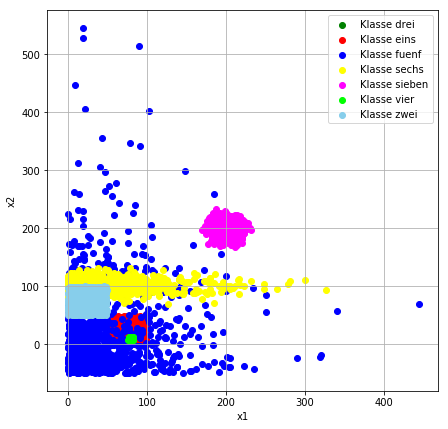

In [4]:
colors = ['green', 'red', 'blue', 'yellow', 'magenta', 'lime', 'skyblue', 'orangered', 'cyan', 'aqua']
hist_cl = np.unique(df['Klasse'].values)
anz_class = len(hist_cl)
plt.figure(figsize(7,7))
for hist_cl, color in zip(hist_cl, colors):
    df_h = df[df.Klasse == hist_cl].values
    y = df_h[:,0:2]
    plt.scatter(y[:,0], y[:,1],
            color=color, marker='o', label='Klasse ' + hist_cl)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.grid()
plt.show()

Das Perzeptron unterscheidet in 2 Klassen, daher werden aus dem Dataframe 2 zu untersuchende Klassen ausgewählt.
#### <font color="#FF0000">Eingabezelle</font>

In [5]:
p_class = ['sieben', 'vier']
d_anz = 10

In [6]:
df_h = df[df.Klasse == p_class[0]].values[0:d_anz, 0:2]
df_h1 = df[df.Klasse == p_class[1]].values[0:d_anz, 0:2]

In [7]:
X = np.append(df_h, df_h1).reshape(-1,2)
y1 = df[df.Klasse == p_class[0]].values[0:d_anz, 2]
y2 = df[df.Klasse == p_class[1]].values[0:d_anz, 2]
y = np.append(y1, y2)
y = np.where(y == p_class[0], -1, 1)

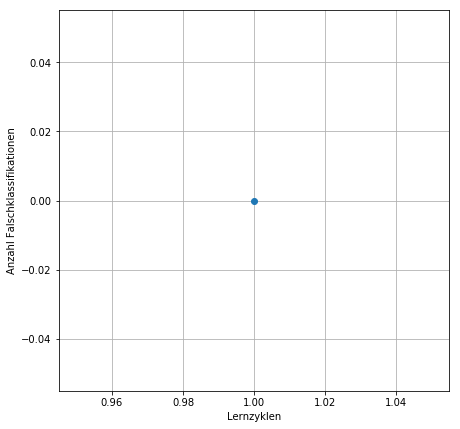

In [8]:
ppn = pc.Perceptron(eta=0.1, n_iter=1000)
w = [140, -1.0, -1.0]
ppn.fit(X, y, w)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.grid()
plt.xlabel('Lernzyklen')
plt.ylabel('Anzahl Falschklassifikationen')
plt.show()

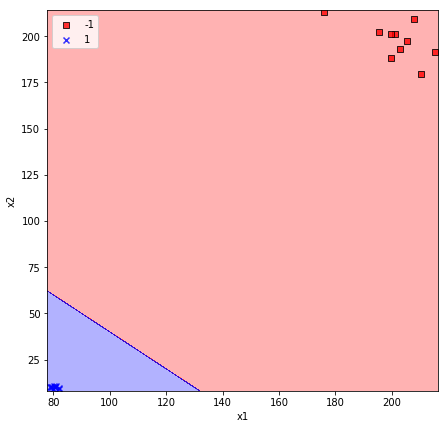

In [9]:
sh.plot_decision_regions(X, y, np.array(ppn.w_), resolution=0.1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()